In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.markov import tauchen, MarkovChain
from asset_pricing_sdf import LucasTreeFiniteMarkov

In [3]:
mu_C = .005  # mean of quarterly per capita consumption growth
sigma_C = .005  # standard deviation of quarterly per capita consumption growth
rho = .25  # persistence of per capita quarterly consumption growth

# standard deviation of the underlying noise distribution
sigma = sigma_C * np.sqrt(1 - rho**2)

m = 2  # number of standard deviations you would like the gridded vector y to cover
n = 5  # number of points in the discretization

y, P = tauchen(rho, sigma, m, n)
mc = MarkovChain(P)

y += mu_C  # consumption growth vector

# Consumption growth matrix
G_C = np.empty((n, n))
G_C[:] = y

# Discount rate
delta = .01

# Coefficient of relative risk aversion
gamma = 20

In [4]:
lt = LucasTreeFiniteMarkov(mc, G_C, gamma, delta)

In [5]:
ts_length = 250
res = lt.simulate(ts_length)

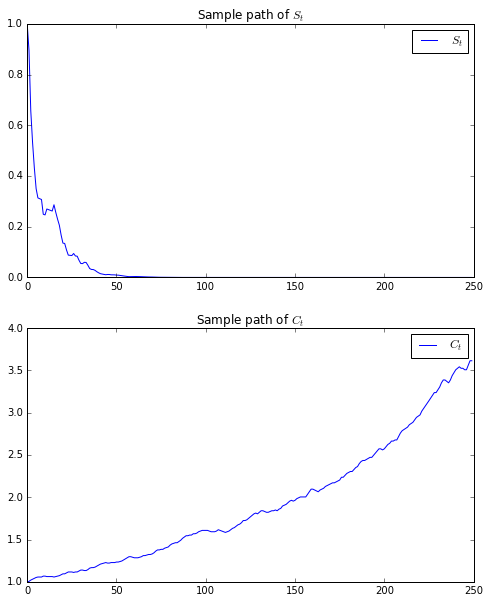

In [6]:
paths = [res.s, res.d]
labels = [r'$S_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend()
plt.show()

In [7]:
lt.v

array([ 10.26478246,   9.97239545,   9.68315692,   9.40092066,   9.1290175 ])

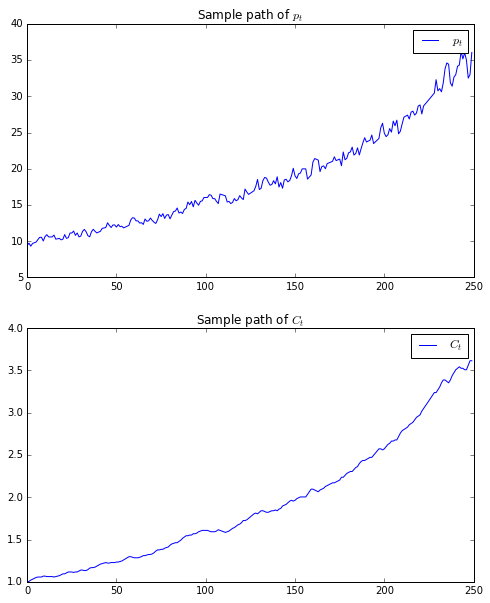

In [8]:
paths = [res.p, res.d]
labels = [r'$p_t$', r'$C_t$']
titles = ['Sample path of ' + label for label in labels]

fig, axes = plt.subplots(2, 1, figsize=(8,10))
for ax, path, label, title in zip(axes, paths, labels, titles):
    ax.plot(path, label=label)
    ax.set_title(title)
    ax.legend()
plt.show()